# Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sn
from sklearn.svm import SVC  

In [2]:
df_test=pd.read_excel('pulsar_data_test.xlsx')
df_train=pd.read_excel('pulsar_data_train.xlsx')

# visualizing sample of the given Datasets for Analysis

In [3]:
df_test.sample(5)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
3779,84.445312,33.648414,NaN,12.432197,7.752508,35.200391,5.150903,27.272943,NaN
2279,102.437500,50.479846,0.701819,0.222519,3.234114,20.875936,8.623847,80.173947,NaN
3359,104.859375,43.450894,0.426375,0.875783,5.371237,25.128818,5.239572,29.697797,NaN
2693,97.476562,42.894851,0.620003,0.610326,1.563545,15.417874,12.106701,165.157195,NaN
410,109.164062,46.074291,0.258365,0.657396,1.003344,11.414580,15.802571,293.475994,NaN


In [4]:
df_train.sample(5)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
5320,117.468750,44.813492,0.091699,0.492070,0.822742,11.311802,16.434945,301.975588,0
10284,58.789062,33.077242,2.826307,15.039862,17.257525,NaN,3.192879,9.012004,1
1188,108.625000,49.378797,0.557022,0.545146,2.673077,18.897390,8.554329,82.768138,0
11232,126.523438,35.285878,0.414295,2.097696,2.199833,13.719760,10.077808,135.106275,0
3449,116.195312,43.592943,0.130678,-0.065056,70.127926,91.982483,0.626675,-1.481847,0


In [5]:

df_test.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

# let's set some shorter column name and remove the spaces infront of column

In [6]:
df_train.columns=['Mean_IP','sd_IP','Excess_kurtosis_IP','Skewness_IP',
                  'Mean_DMSNR_curve','sd_DMSNR_Curve','Ekurtosis_DMSNR_curve',
                 'Skewness_DMSNR_curve','target_class']

df_test.columns=['Mean_IP','sd_IP','Excess_kurtosis_IP','Skewness_IP',
                  'Mean_DMSNR_curve','sd_DMSNR_Curve','Ekurtosis_DMSNR_curve',
                 'Skewness_DMSNR_curve','target_class']

In [7]:
df_train.head()

,Mean_IP,sd_IP,Excess_kurtosis_IP,Skewness_IP,Mean_DMSNR_curve,sd_DMSNR_Curve,Ekurtosis_DMSNR_curve,Skewness_DMSNR_curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0


In [8]:
df_test.head()

,Mean_IP,sd_IP,Excess_kurtosis_IP,Skewness_IP,Mean_DMSNR_curve,sd_DMSNR_Curve,Ekurtosis_DMSNR_curve,Skewness_DMSNR_curve,target_class
0,116.906250,48.920605,0.186046,-0.129815,3.037625,17.737102,8.122621,78.813405,NaN
1,75.585938,34.386254,2.025498,8.652913,3.765050,21.897049,7.048189,55.878791,NaN
2,103.273438,46.996628,0.504295,0.821088,2.244983,15.622566,9.330498,105.134941,NaN
3,101.078125,48.587487,1.011427,1.151870,81.887960,81.464136,0.485105,-1.117904,NaN
4,113.226562,48.608804,0.291538,0.292120,6.291806,26.585056,4.540138,21.708268,NaN


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Mean_IP                12528 non-null  float64
 1   sd_IP                  12528 non-null  float64
 2   Excess_kurtosis_IP     10793 non-null  float64
 3   Skewness_IP            12528 non-null  float64
 4   Mean_DMSNR_curve       12528 non-null  float64
 5   sd_DMSNR_Curve         11350 non-null  float64
 6   Ekurtosis_DMSNR_curve  12528 non-null  float64
 7   Skewness_DMSNR_curve   11903 non-null  float64
 8   target_class           12528 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 881.0 KB


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5370 entries, 0 to 5369
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Mean_IP                5370 non-null   float64
 1   sd_IP                  5370 non-null   float64
 2   Excess_kurtosis_IP     4603 non-null   float64
 3   Skewness_IP            5370 non-null   float64
 4   Mean_DMSNR_curve       5370 non-null   float64
 5   sd_DMSNR_Curve         4846 non-null   float64
 6   Ekurtosis_DMSNR_curve  5370 non-null   float64
 7   Skewness_DMSNR_curve   5126 non-null   float64
 8   target_class           0 non-null      float64
dtypes: float64(9)
memory usage: 377.7 KB


# we have 9 objects, 8 float and 1 integer types as we understood from the info method above

In [11]:
df_test.isna().sum()

Mean_IP                     0
sd_IP                       0
Excess_kurtosis_IP        767
Skewness_IP                 0
Mean_DMSNR_curve            0
sd_DMSNR_Curve            524
Ekurtosis_DMSNR_curve       0
Skewness_DMSNR_curve      244
target_class             5370
dtype: int64

# as we are seeing the we have null values in the 4 columns and the target class column all are null values

In [12]:
df_train.isna().sum()

Mean_IP                     0
sd_IP                       0
Excess_kurtosis_IP       1735
Skewness_IP                 0
Mean_DMSNR_curve            0
sd_DMSNR_Curve           1178
Ekurtosis_DMSNR_curve       0
Skewness_DMSNR_curve      625
target_class                0
dtype: int64

# as we are seeing the we have null values in the 3 columns

In [13]:
df_test['target_class']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
5365   NaN
5366   NaN
5367   NaN
5368   NaN
5369   NaN
Name: target_class, Length: 5370, dtype: float64

In [14]:
df_train['sd_IP']

0        48.372971
1        36.175557
2        53.229534
3        48.865942
4        36.117659
           ...    
12523    53.179053
12524    46.784600
12525    43.213846
12526    49.933749
12527    50.472256
Name: sd_IP, Length: 12528, dtype: float64

In [15]:
df_train['sd_IP'].mean(), df_train['sd_IP'].median(), df_train['sd_IP'].mode()

(46.521437311461526,
 46.931022185,
 0     38.904291
 1     40.515188
 2     40.750947
 3     43.360608
 4     43.404709
 5     43.545583
 6     44.024851
 7     44.259875
 8     44.774773
 9     45.626025
 10    46.208680
 11    47.343551
 12    47.466371
 13    47.680987
 14    48.105099
 15    48.622178
 16    49.196907
 17    50.185941
 Name: sd_IP, dtype: float64)

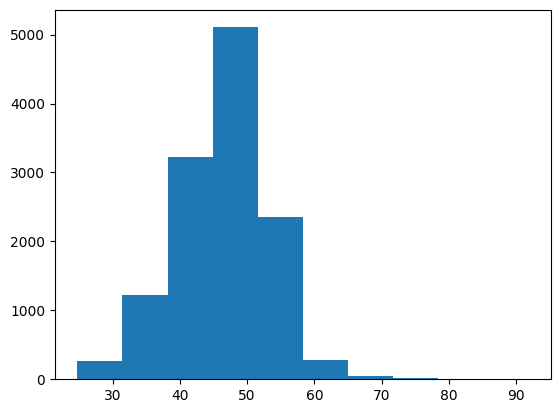

In [16]:
plt.hist(df_train['sd_IP'])
plt.show()

In [17]:
df_test['sd_IP'].mean(), df_test['sd_IP'].median(),df_test['sd_IP'].mode()

(46.61507434829609,
 47.03130384,
 0    44.448726
 1    46.521962
 2    47.239766
 3    48.912190
 4    51.042749
 5    51.829159
 6    51.943887
 Name: sd_IP, dtype: float64)

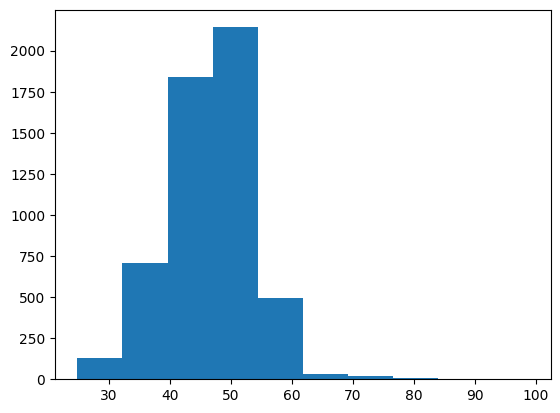

In [18]:
plt.hist(df_test['sd_IP'])
plt.show()

# Checking it's statical properties like standard deviation, mean, maximum ,minimum and etc

In [19]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Mean_IP,12528.0,111.041841,25.672828,5.812500,100.871094,115.183594,127.109375,189.734375
sd_IP,12528.0,46.521437,6.801077,24.772042,42.362222,46.931022,50.979103,91.808628
Excess_kurtosis_IP,10793.0,0.478548,1.064708,-1.738021,0.024652,0.223678,0.473125,8.069522
Skewness_IP,12528.0,1.778431,6.208450,-1.791886,-0.188142,0.203317,0.932374,68.101622
Mean_DMSNR_curve,12528.0,12.674758,29.613230,0.213211,1.910535,2.792642,5.413253,222.421405
sd_DMSNR_Curve,11350.0,26.351318,19.610842,7.370432,14.404353,18.412402,28.337418,110.642211
Ekurtosis_DMSNR_curve,12528.0,8.333489,4.535783,-3.139270,5.803063,8.451097,10.727927,34.539844
Skewness_DMSNR_curve,11903.0,105.525779,107.399585,-1.976976,35.199899,83.126301,139.997850,1191.000837
target_class,12528.0,0.092034,0.289085,0.000000,0.000000,0.000000,0.000000,1.000000


In [20]:
df_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Mean_IP,5370.0,111.168917,25.608635,6.179688,101.041016,114.757812,127.023438,192.617188
sd_IP,5370.0,46.615074,6.940638,24.791612,42.408020,47.031304,51.133444,98.778911
Excess_kurtosis_IP,4603.0,0.483676,1.076893,-1.876011,0.030643,0.227314,0.475056,7.608370
Skewness_IP,5370.0,1.751260,6.072820,-1.764717,-0.189557,0.186468,0.918807,65.385974
Mean_DMSNR_curve,5370.0,12.473587,29.145134,0.213211,1.956522,2.830686,5.590301,223.392140
sd_DMSNR_Curve,4846.0,26.425371,19.384489,7.370432,14.555826,18.549670,28.681787,109.712649
Ekurtosis_DMSNR_curve,5370.0,8.233724,4.435683,-2.721857,5.700461,8.383695,10.632265,34.539844
Skewness_DMSNR_curve,5126.0,102.869088,104.748418,-1.964998,33.817330,81.392046,136.893502,1191.000837
target_class,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Modelling 

In [21]:
y = df_train["target_class"] # Target->y
X = df_train.drop("target_class", axis=1) #features -> X

In [22]:
X.sample(10)

,Mean_IP,sd_IP,Excess_kurtosis_IP,Skewness_IP,Mean_DMSNR_curve,sd_DMSNR_Curve,Ekurtosis_DMSNR_curve,Skewness_DMSNR_curve
2747,108.875000,41.522396,0.404871,0.429777,2.245819,14.575077,8.878035,103.341953
11776,129.601562,48.919471,0.278881,0.068817,4.089465,21.943326,6.375726,45.335855
10669,122.039062,48.921877,0.085125,-0.008021,1.689799,13.096054,11.099423,157.785141
6299,91.414062,38.351892,0.516893,1.851243,1.579431,12.183363,12.490852,201.964938
11698,138.046875,43.848257,-0.134319,0.593690,1.947324,11.764470,11.888007,202.661316
5916,48.078125,32.400234,3.596613,17.314981,64.764214,72.629123,1.105638,0.280693
6729,97.382812,42.618973,0.389174,0.730250,5.469064,30.450764,5.781567,33.116042
708,110.085938,48.522873,0.309724,0.352251,4.532609,27.616638,6.383184,40.987709
5402,109.523438,41.465340,0.414328,0.854680,6.895485,NaN,5.274720,28.375254
11069,77.632812,37.177545,0.775593,2.811338,2.520903,15.776090,8.724039,93.938700


In [23]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target_class, dtype: int64

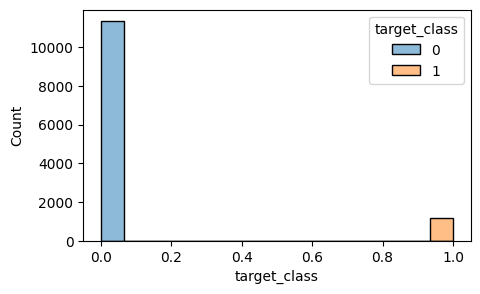

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5,3))
sn.histplot(x=df_train['target_class'], hue=y, kde=True)
plt.show()

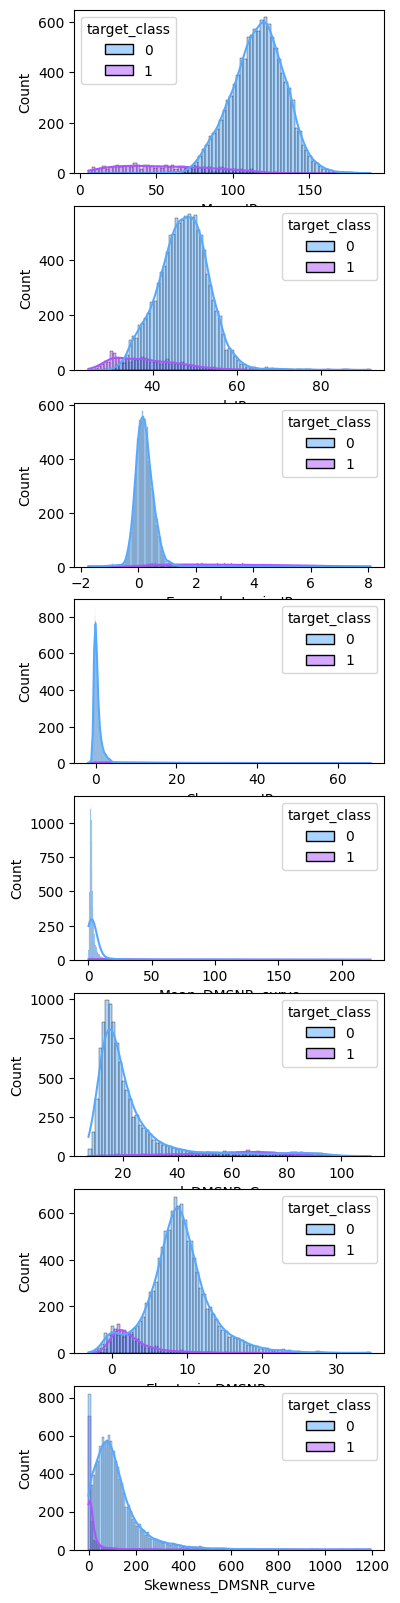

In [25]:
# Creating histplots
fig, axes = plt.subplots(nrows=8, ncols=1, figsize=(4,20))
for i in range(len(X.columns)):
    col = X.columns[i]
    sn.histplot(x=df_train[col], hue=y, palette="cool", kde=True, ax=axes[i])
plt.show()

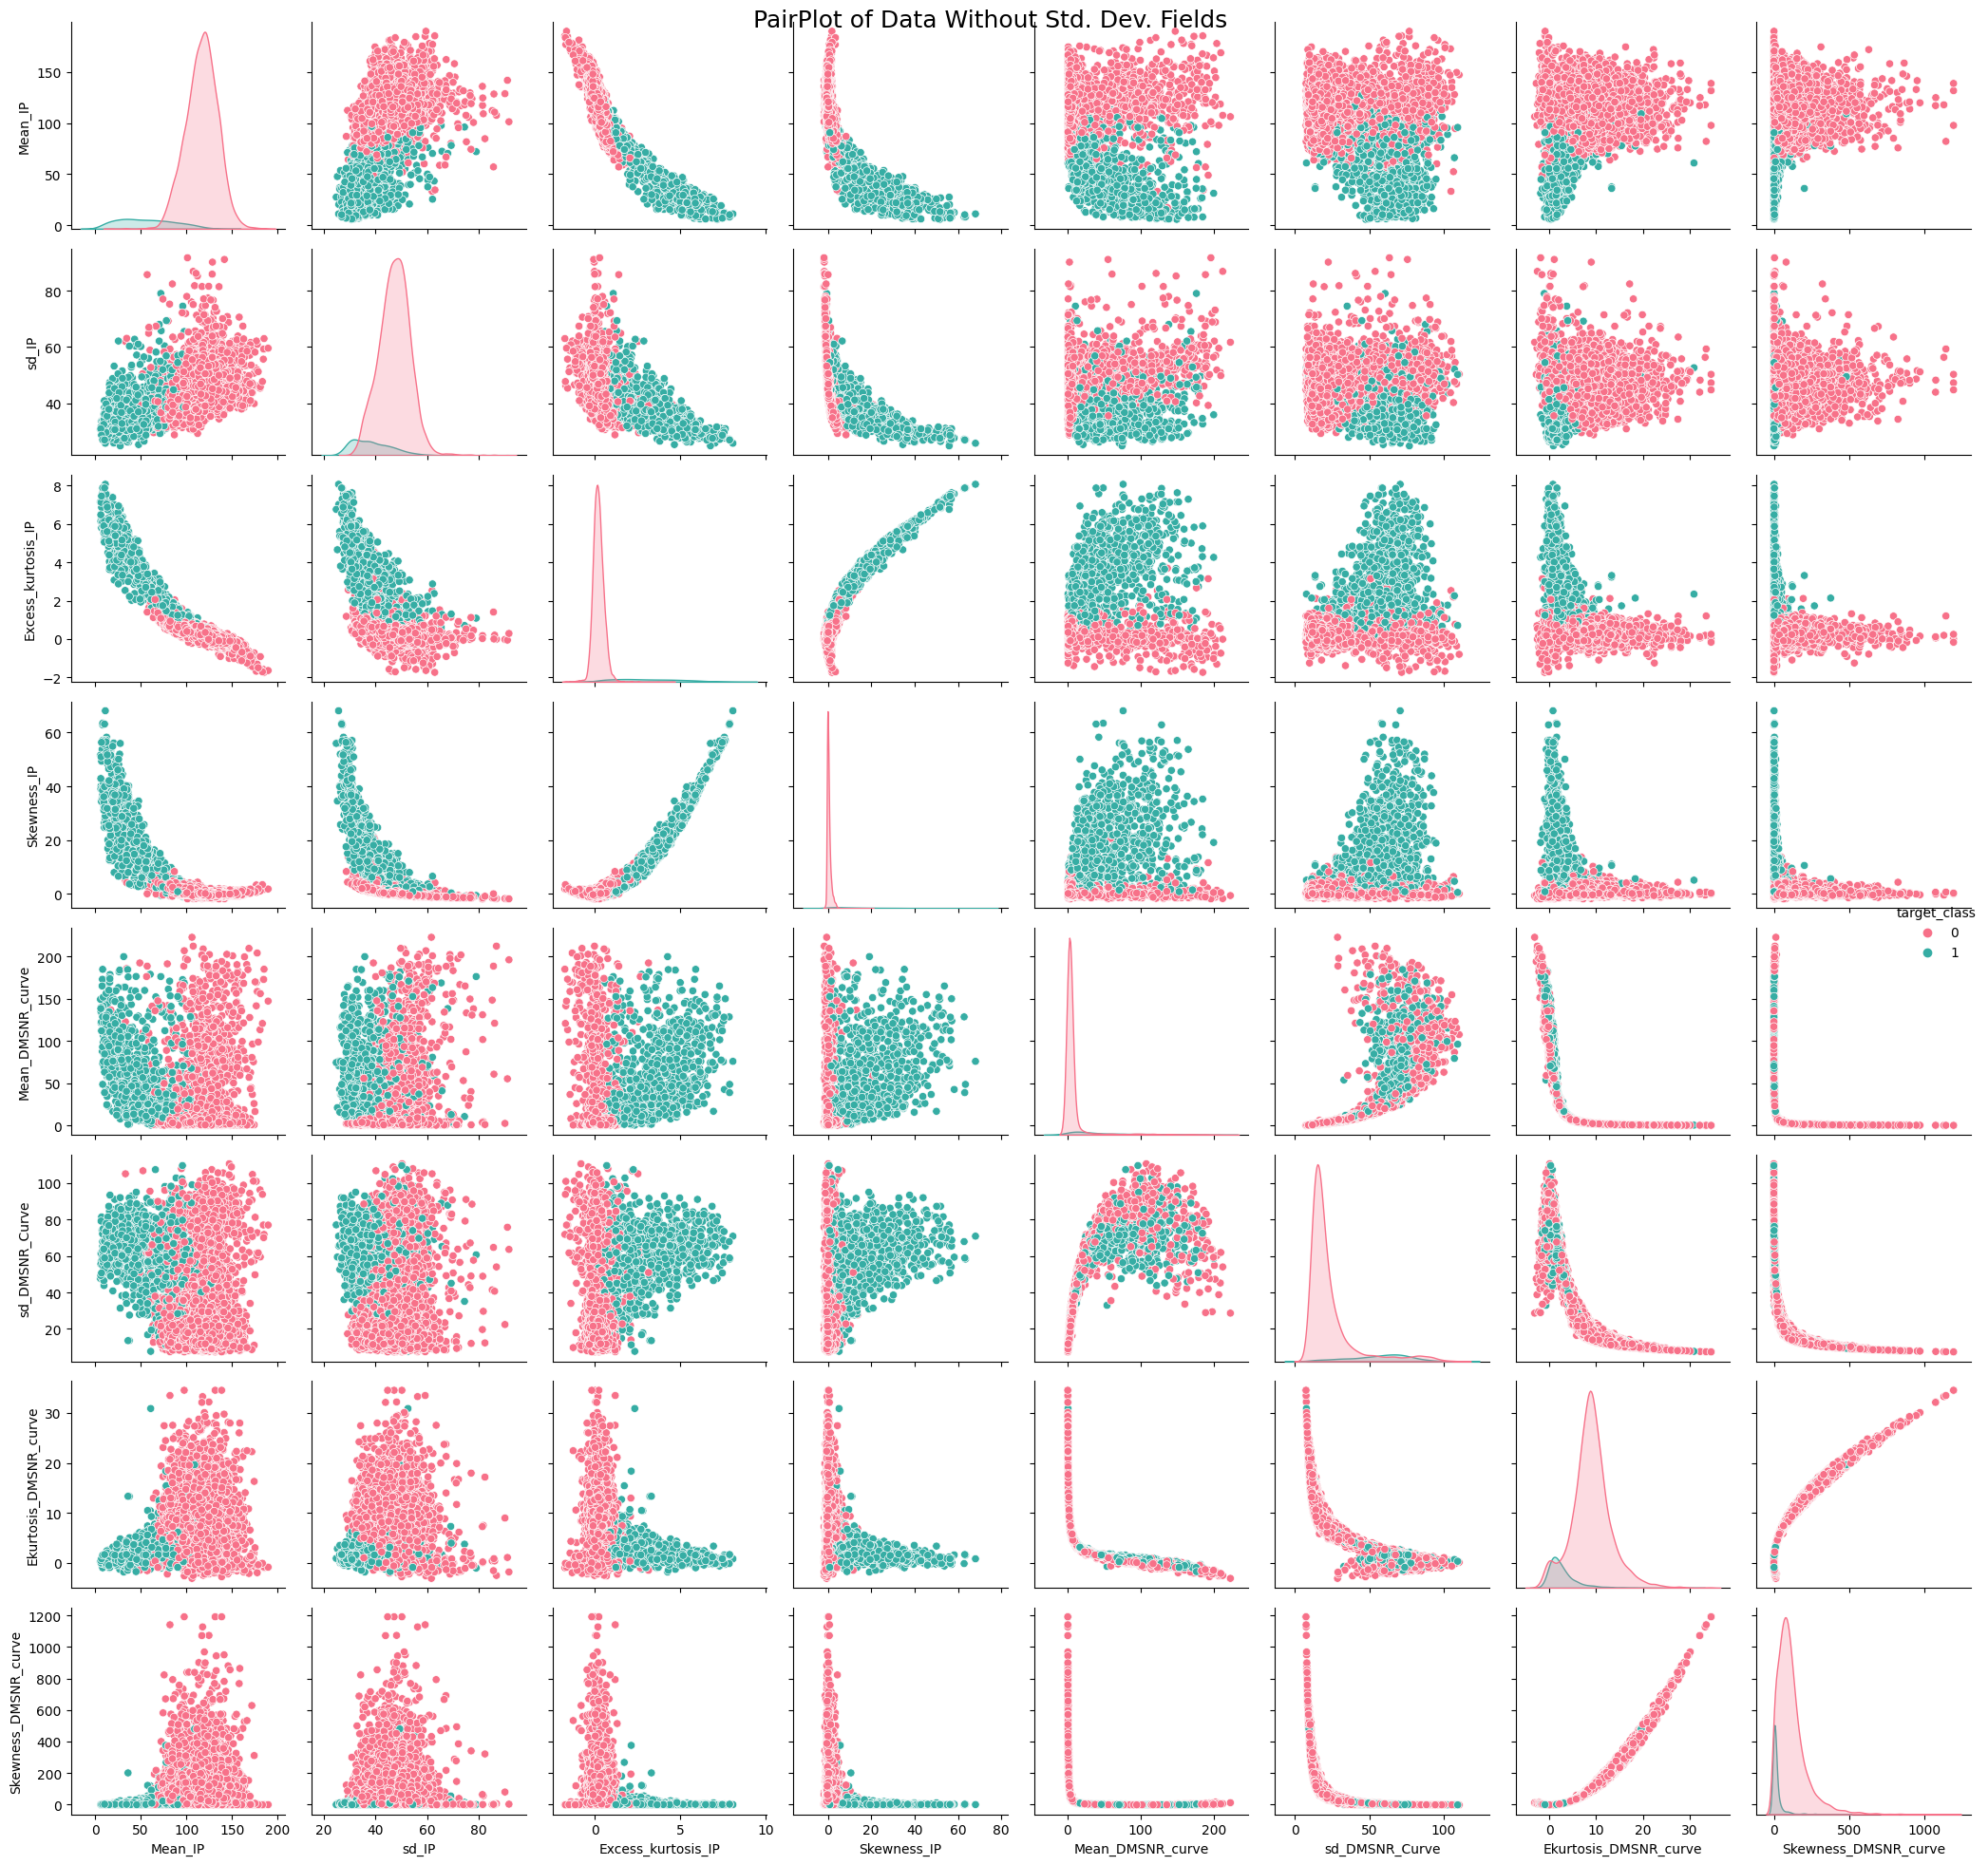

In [26]:
sn.pairplot(data=df_train,
             palette="husl",
             hue="target_class",
             vars=['Mean_IP','sd_IP','Excess_kurtosis_IP','Skewness_IP',
                  'Mean_DMSNR_curve','sd_DMSNR_Curve','Ekurtosis_DMSNR_curve',
                 'Skewness_DMSNR_curve'])

plt.suptitle("PairPlot of Data Without Std. Dev. Fields",fontsize=18)

plt.tight_layout()
plt.show()

# Plotting the Correlation Heatmap

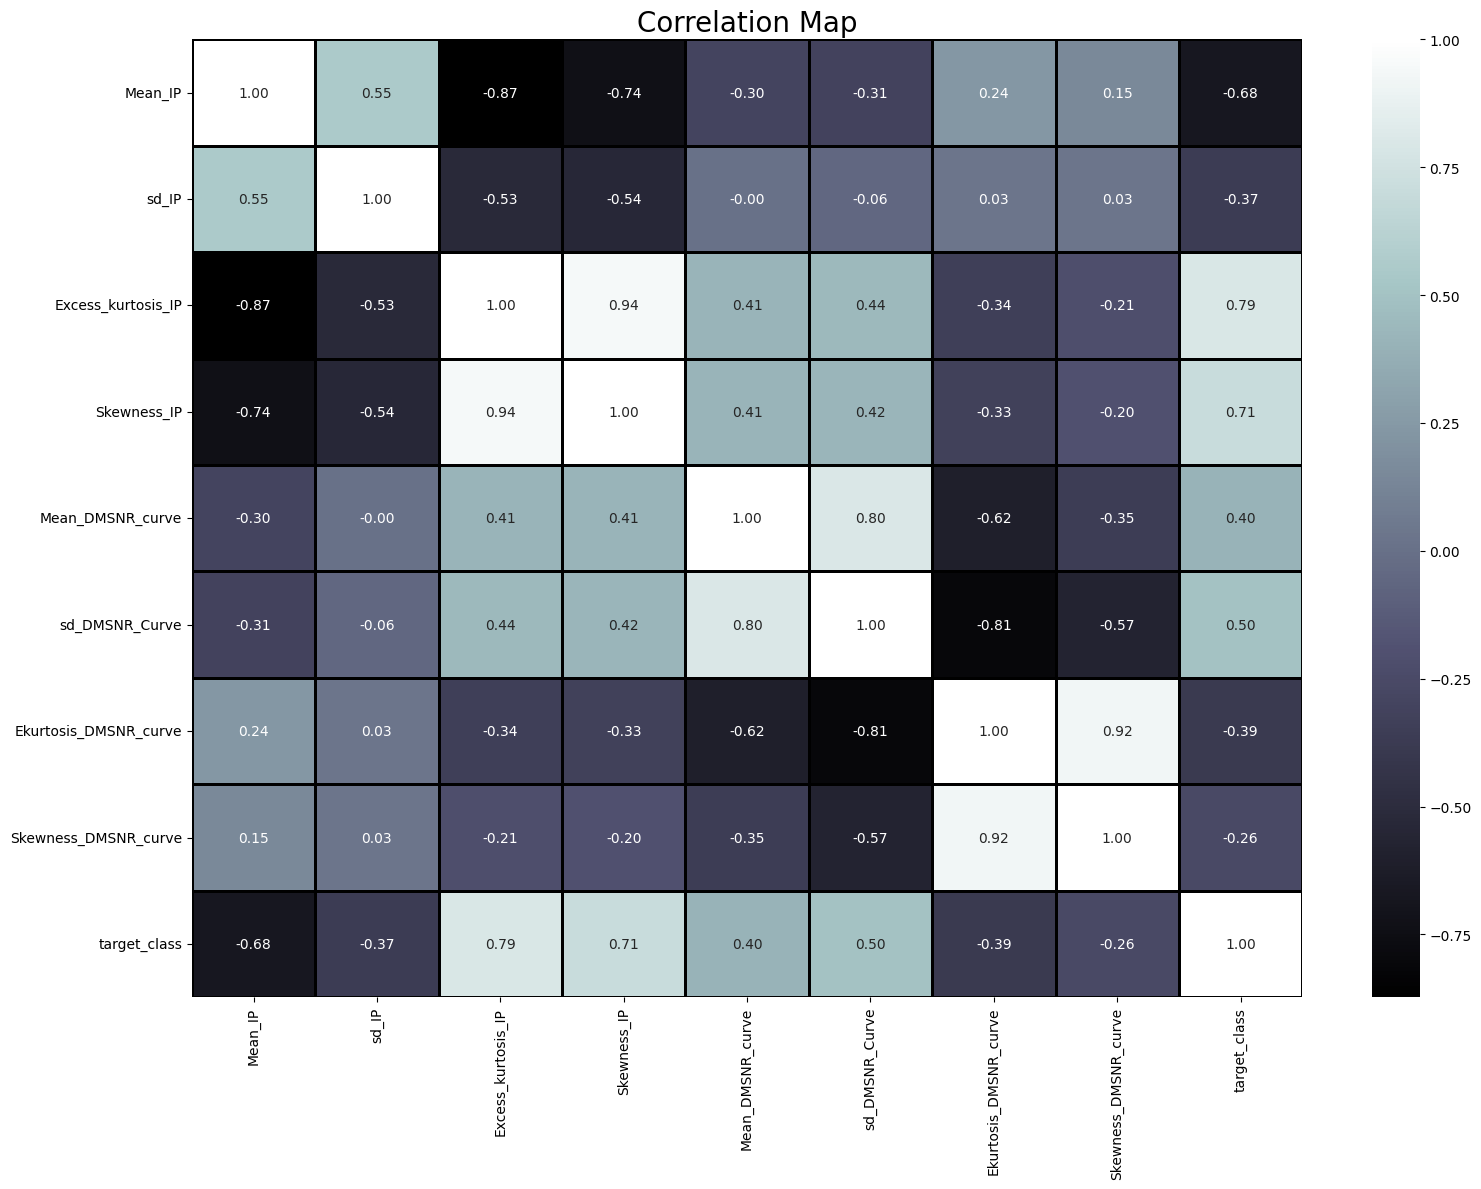

In [27]:
plt.figure(figsize=(16,12))
sn.heatmap(data=df_train.corr(),annot=True,cmap="bone",linewidths=1,fmt=".2f",linecolor="black")
plt.title("Correlation Map",fontsize=20)
plt.tight_layout()
plt.show()  

# let fill the null values by the median, as we saw the above the median, and mean are not more far from each other 

In [28]:
M1=df_train['Excess_kurtosis_IP'].median()
M2=df_train['sd_DMSNR_Curve'].median()
M3=df_train['Skewness_DMSNR_curve'].median()

In [29]:
df_train['Excess_kurtosis_IP']= df_train['Excess_kurtosis_IP'].fillna(M1)
df_test['Excess_kurtosis_IP']= df_train['Excess_kurtosis_IP'].fillna(M1)

df_train['sd_DMSNR_Curve']= df_train['sd_DMSNR_Curve'].fillna(M2)
df_test['sd_DMSNR_Curve']= df_train['sd_DMSNR_Curve'].fillna(M2)

df_train['Skewness_DMSNR_curve']= df_train['Skewness_DMSNR_curve'].fillna(M3)
df_test['Skewness_DMSNR_curve']= df_train['Skewness_DMSNR_curve'].fillna(M3)

# now there is no null values as we see it below

In [30]:
df_train.isna().sum()

Mean_IP                  0
sd_IP                    0
Excess_kurtosis_IP       0
Skewness_IP              0
Mean_DMSNR_curve         0
sd_DMSNR_Curve           0
Ekurtosis_DMSNR_curve    0
Skewness_DMSNR_curve     0
target_class             0
dtype: int64

In [31]:
df_test.isna().sum()

Mean_IP                     0
sd_IP                       0
Excess_kurtosis_IP          0
Skewness_IP                 0
Mean_DMSNR_curve            0
sd_DMSNR_Curve              0
Ekurtosis_DMSNR_curve       0
Skewness_DMSNR_curve        0
target_class             5370
dtype: int64

# classify Train and Test data.
- we have to drop the target column from the decision part because it's the predicted part  and assign to x
- we have to assign the target to y and predict it later.
(we done this in the above section droping target class and assigning.)

In [32]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score,f1_score, roc_curve
import sklearn
from sklearn.preprocessing  import StandardScaler

In [33]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [34]:
x_train.shape, x_test.shape

((10022, 8), (2506, 8))

In [35]:
pd.DataFrame(x_train)

,Mean_IP,sd_IP,Excess_kurtosis_IP,Skewness_IP,Mean_DMSNR_curve,sd_DMSNR_Curve,Ekurtosis_DMSNR_curve,Skewness_DMSNR_curve
2807,105.265625,47.133534,0.349805,0.076542,1.571070,11.512642,12.321956,215.880254
277,125.609375,49.446504,0.206675,-0.087822,11.276756,40.575989,3.754500,NaN
5531,103.179688,46.636968,0.437446,0.584243,0.963211,11.997226,14.366312,233.257157
4561,106.828125,52.480519,0.505618,-0.190119,2.085284,16.107740,10.082572,123.418084
415,113.617188,40.970859,0.409877,0.852932,0.780100,11.336343,16.770792,NaN
...,...,...,...,...,...,...,...,...
5534,109.109375,40.539956,0.137629,0.583860,2.507525,13.543839,9.223733,122.842867
1460,114.703125,51.519772,0.447555,-0.201113,2.172241,15.399651,11.036540,145.217623
2623,132.414062,49.045025,NaN,0.179580,2.994983,NaN,7.746605,80.918757
3712,155.601562,43.847630,-0.231656,0.392375,1.695652,13.449000,10.436665,138.453741


In [36]:
x_train_array = sklearn.preprocessing.StandardScaler().fit_transform(x_train)
x_test_array = sklearn.preprocessing.StandardScaler().fit_transform(x_test)

## checking is needed here if any problem arise?

In [37]:
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

In [38]:
x_train.fillna(0, inplace=True)
x_test.fillna(0, inplace=True)

In [39]:
x_test.head()

,Mean_IP,sd_IP,Excess_kurtosis_IP,Skewness_IP,Mean_DMSNR_curve,sd_DMSNR_Curve,Ekurtosis_DMSNR_curve,Skewness_DMSNR_curve
4083,138.789062,55.492349,0.000000,-0.299754,4.204013,23.350217,6.696372,49.432385
3167,133.625000,45.826950,-0.010363,0.328607,1.870401,16.057196,10.449203,123.313353
8079,99.023438,52.746514,0.497680,0.070501,1.341137,16.029207,13.165966,181.165137
4597,15.835938,35.206040,0.000000,30.604459,111.865385,58.547178,0.200295,0.349278
8142,112.914062,50.534027,0.280863,-0.175892,2.654682,17.718639,8.482961,83.624691


In [40]:
# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(x_train,y_train)


# make predictions on test set
y_pred=svc.predict(x_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Model f1 score with default hyperparameters: {0:0.4f}'. format(f1_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9749
Model f1 score with default hyperparameters: 0.8364


In [41]:
# # USing grid search 
# svc_clf = SVC()
# params = [{
#     'C':np.arange(0.01,10.0,0.1),
#     'kernel':['linear','poly','rbf','sigmoid'],
#     'degree':range(1,20),
#     "gamma" : ['scale','auto'],
#     'probability':[True],
#     'class_weight':['balanced'],
#     'random_state':[21],
#     'max_iter':[-1],
# }]


# random_search_svc_clf = RandomizedSearchCV(svc_clf, scoring = 'f1', param_distributions=params, 
#                                            n_jobs = -1, return_train_score = True, n_iter=100, cv=2, random_state=21)
# random_search_svc_clf.fit(x_train,y_train)
# print("Best parameters scores:")
# print(random_search_svc_clf.best_params_)
# df = pd.DataFrame(random_search_svc_clf.cv_results_)
# print("Mean Train Score:", random_search_svc_clf.cv_results_['mean_train_score'][df[df['mean_test_score']==
#                                                                             random_search_svc_clf.best_score_].index][0])
# print("Mean Validation score:", random_search_svc_clf.best_score_)

In [42]:
clf = SVC(random_state=21, probability= True, max_iter= -1, kernel= 'rbf', gamma= 'auto', 
          degree = 9, class_weight= 'balanced', C= 2.51)


clf.fit(x_train,y_train) # fit classifier to training set



y_pred=clf.predict(x_test) # make predictions on test set

In [43]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[2285,    4],
       [ 211,    6]], dtype=int64)

# visualize confusion matrix 

<AxesSubplot: >

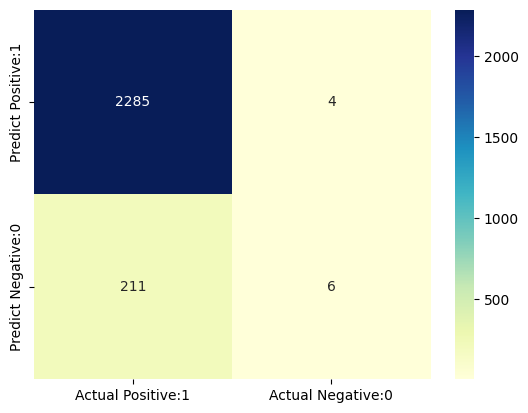

In [44]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sn.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2289
           1       0.60      0.03      0.05       217

    accuracy                           0.91      2506
   macro avg       0.76      0.51      0.50      2506
weighted avg       0.89      0.91      0.88      2506



In [46]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]


precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Precision : 0.9983
Recall or Sensitivity : 0.9155
True Positive Rate : 0.9155
False Positive Rate : 0.4000
Specificity : 0.6000
